In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
import sklearn
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import random
import warnings

In [72]:
path = r"C:\Users\venablecrofta\OneDrive - Virginia Tech\Desktop\Classes\S25\Project\PHM08\train.csv"
test_path = r"C:\Users\venablecrofta\OneDrive - Virginia Tech\Desktop\Classes\S25\Project\PHM08\test.csv"
# column_names_1 = ['id', 'cycles', 'setting_1', 'setting_2', 'setting_3']
# column_names_2 = [f"s_{x}" for x in range(1, 22)]
# column_names = column_names_1 + column_names_2


# df_train = pd.read_csv(path, header=None, delimiter=r"\s+")
# df_train.head()

# df_train = df.set_axis(column_names, axis=1)
# df_train.head()

def apply_names (path):
    column_names_1 = ['id', 'cycles', 'setting_1', 'setting_2', 'setting_3']
    column_names_2 = [f"s_{x}" for x in range(1, 22)]
    column_names = column_names_1 + column_names_2
    df  = pd.read_csv(path, header=None, delimiter =r"\s+")
    df = df.set_axis(column_names, axis=1)
    df["RUL"] = df.groupby(["id"])["cycles"].transform(max) - df["cycles"]
    df["RUL"] = (df["cycles"] / df.groupby(["id"])["cycles"].transform(max))
    return df
df_train = apply_names(path)
df_test = apply_names(test_path)

In [ ]:
train_cycles_id = df_train.groupby("id")["cycles"].max().reset_index()
train_cycles_id.columns = ["id", "cycles"]
plt.style.use("dark_background")
plt.figure(figsize=(8, 24))
sns.barplot(data=train_cycles_id, y="id", x="cycles", orient="h", palette = 'husl')
plt.title("Engines Lifetime in Cycles (Train Dataset)", fontweight="bold", size=20)
plt.xlabel("Time (in cycles)", fontweight="bold", size=15)
plt.ylabel("Engine ID", fontweight="bold", size=15)
plt.yticks(size=10)
plt.xticks(size=10)
plt.show()

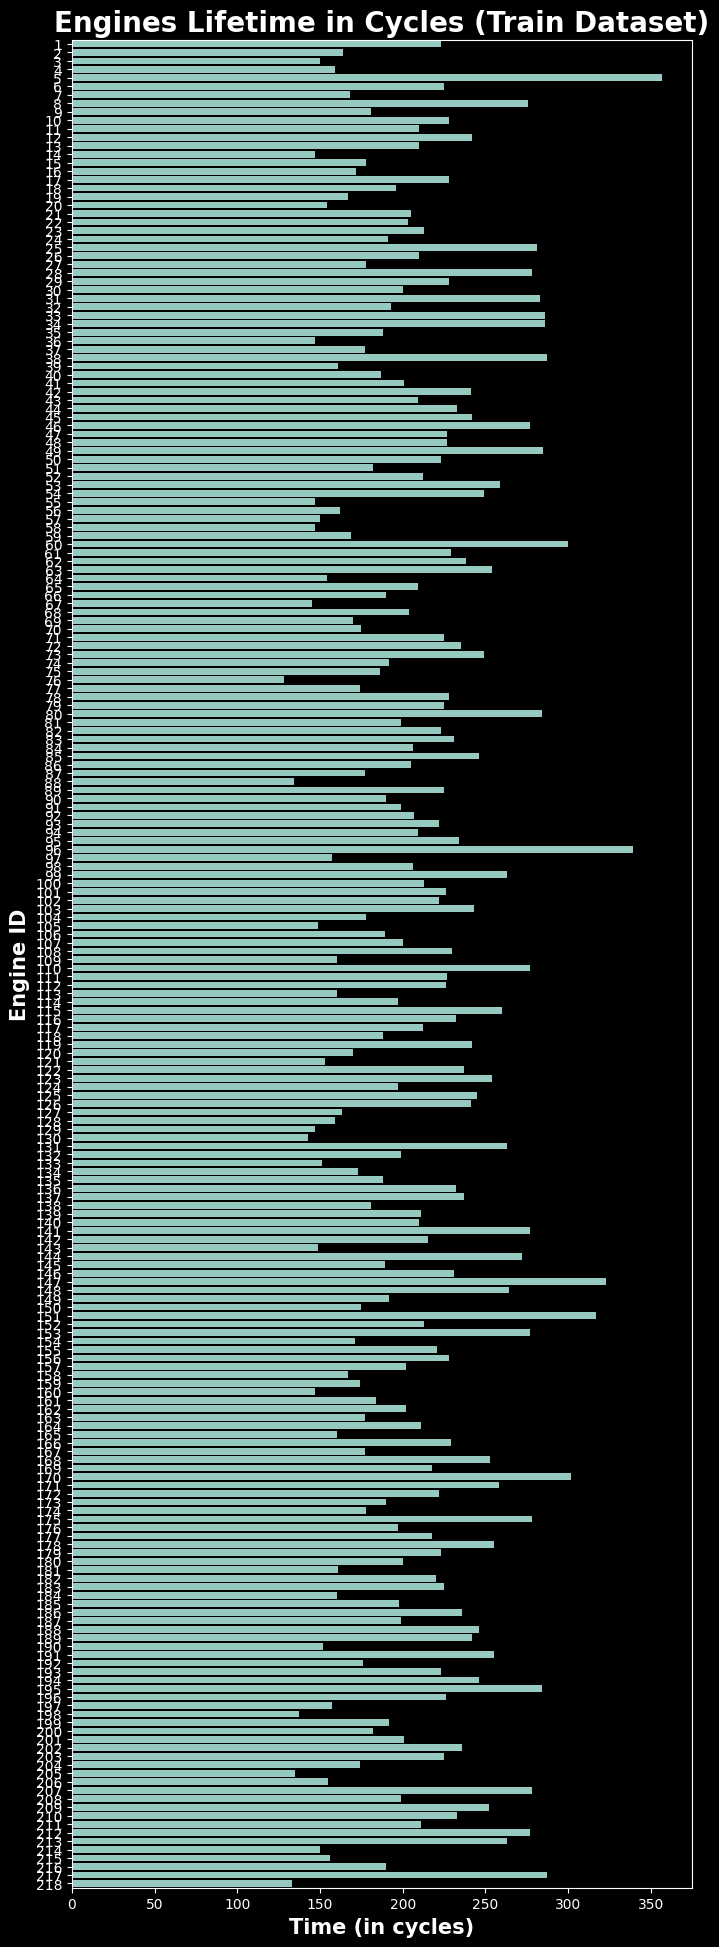

In [65]:
train_cycles_id = df_train.groupby("id")["cycles"].max().reset_index()
train_cycles_id.columns = ["id", "cycles"]

plt.style.use("dark_background")
plt.figure(figsize=(8, 24))
sns.barplot(data=train_cycles_id, y="id", x="cycles", orient="h")
plt.title("Engines Lifetime in Cycles (Train Dataset)", fontweight="bold", size=20)
plt.xlabel("Time (in cycles)", fontweight="bold", size=15)
plt.ylabel("Engine ID", fontweight="bold", size=15)
plt.yticks(size=10)
plt.xticks(size=10)
plt.show()

In [77]:
sensor_cols = [f"s_{x}" for x in range(1, 22)]
x_train = df_train[sensor_cols]
y_train = df_train["RUL"]

# Add rolling features (e.g., moving average of s_7)
df_train["s_7_rolling_avg"] = df_train.groupby("id")["s_7"].transform(
    lambda x: x.rolling(window=10, min_periods=1).mean()
)

print(np.shape(x_train))
print(np.shape(x_test))

(45918, 21)
(29820, 16)


In [74]:
from sklearn.linear_model import BayesianRidge

model = BayesianRidge(
    alpha_1=1e-6,  # Weak prior on precision
    lambda_1=1e-6  # Weak prior on coefficients
)
model.fit(X_train, y_train)

# Predictions with uncertainty
y_pred_mean, y_pred_std = model.predict(X_test, return_std=True)

ValueError: Found input variables with inconsistent numbers of samples: [16, 45918]